In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


plt.style.use("default")

df = pd.read_csv("../data/drafted_cleaned.csv")

#Escludere i valori non calcolabili (-100)
df_val = df.copy()
df_val["WS"] = df_val["WS"].replace(-100, pd.NA)

#Aggregazione WS per college
college_ws = (
    df_val.groupby("College")["WS"]
    .sum(min_count=1)       # ignora NaN e valori non calcolabili
    .sort_values(ascending=False)
)

#Top 20 college più produttivi
top20_college = college_ws.head(20)
print(top20_college)


College
UCLA              2178.2
High School       2177.3
UNC               2064.7
Kentucky          1909.0
Duke              1655.2
Kansas            1306.6
Arizona           1007.9
Michigan           914.3
Michigan State     880.0
Indiana            862.8
UConn              827.3
Texas              807.0
Wake Forest        796.4
Georgetown         793.7
Ohio State         781.7
Villanova          758.6
Georgia Tech       750.2
Notre Dame         696.6
USC                694.8
Louisville         673.4
Name: WS, dtype: float64


/var/folders/9m/m105xtks2r56v0bf4np7z4p40000gn/T/ipykernel_45320/1620890458.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


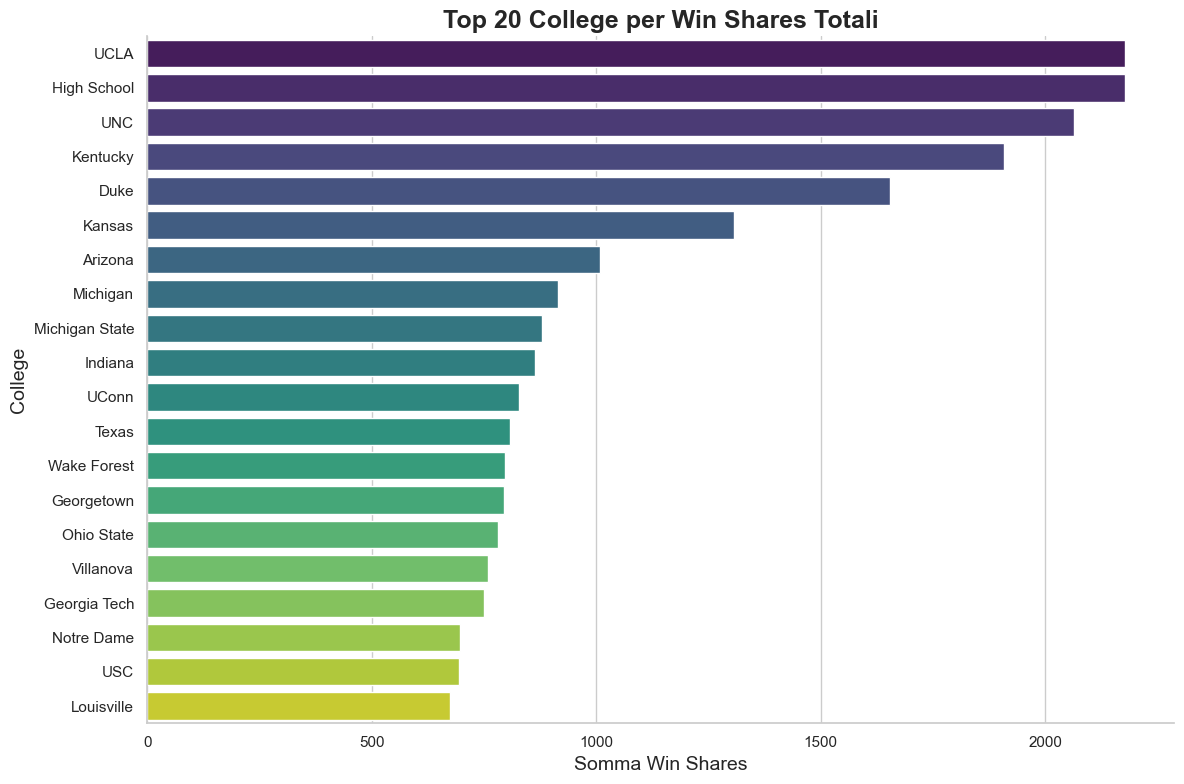

In [18]:
#Grafico dei top 20 college

# Plot
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

sns.barplot(
    x=top20_college.values,
    y=top20_college.index,
    palette="viridis"
)

plt.title("Top 20 College per Win Shares Totali", fontsize=18, fontweight="bold")
plt.xlabel("Somma Win Shares", fontsize=14)
plt.ylabel("College", fontsize=14)

sns.despine()
plt.tight_layout()
plt.show()

Perché “High School” genera così tante Win Shares?
Perché alcune delle più grandi superstar della storia NBA sono entrate direttamente dalla High School, senza passare per l’università.
Questi giocatori hanno spesso carriere lunghissime e super produttive.
Ecco alcuni dei più famosi:
⭐ Giocatori entrati direttamente dalla High School (con WS altissime)
🔥 LeBron James — 250+ WS
Probabilmente il giocatore più produttivo della storia NBA.
🔥 Kevin Garnett — 200+ WS
15x All-Star, MVP 2004.
🔥 Kobe Bryant — 174 WS
Uno dei più forti di sempre.
🔥 Dwight Howard — 100+ WS
8x All-Star, leader difensivo.
🔥 Tracy McGrady
Hall of Famer, enorme impatto nei primi anni 2000.
🔥 Jermaine O'Neal
6x All-Star.

In [19]:
# Recupero i top 3 college dal totale WS
top3_colleges = college_ws.head(3).index.tolist()

print("Top 3 college per WS totale:")
print(college_ws.head(3), "\n")

# Dizionario che conterrà i top 5 giocatori per ogni college
top_players_per_college = {}

for college in top3_colleges:
    # Filtra solo i giocatori di quel college con WS valido
    subset = (
        df_val[df_val["College"] == college]
        .dropna(subset=["WS"])                   # esclude WS non calcolabili
        .sort_values("WS", ascending=False)      # ordina dal più forte
        .head(5)[["Player", "DraftYear", "Tm", "WS"]]
    )
    top_players_per_college[college] = subset

# Stampa i risultati
for college, players_df in top_players_per_college.items():
    print(f"\n=== Top 5 giocatori per {college} (ordinati per WS) ===")
    display(players_df)  # Se sei su Jupyter. Se sei su VS Code, usa print(players_df)


Top 3 college per WS totale:
College
UCLA           2178.2
High School    2177.3
UNC            2064.7
Name: WS, dtype: float64 


=== Top 5 giocatori per UCLA (ordinati per WS) ===


,Player,DraftYear,Tm,WS
2350,Kareem Abdul-Jabbar,1969,MIL,273.4
6002,Reggie Miller,1987,IND,174.4
7313,Russell Westbrook,2008,SEA,112.4
7314,Kevin Love,2008,MEM,94.9
3980,Marques Johnson,1977,MIL,79.8



=== Top 5 giocatori per High School (ordinati per WS) ===


,Player,DraftYear,Tm,WS
7013,LeBron James,2003,CLE,270.2
6556,Kevin Garnett,1995,MIN,191.4
6622,Kobe Bryant,1996,CHH,172.7
7071,Dwight Howard,2004,ORL,141.7
6900,Tyson Chandler,2001,LAC,102.1



=== Top 5 giocatori per UNC (ordinati per WS) ===


,Player,DraftYear,Tm,WS
5442,Michael Jordan,1984,CHI,214.0
6729,Vince Carter,1998,GSW,125.3
5443,Sam Perkins,1984,DAL,105.4
6555,Rasheed Wallace,1995,WSB,105.1
3045,Bob McAdoo,1972,BUF,89.1
